# Image Recognition using CNN on CIFAR-10 Dataset

In [1]:
import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D
from pathlib import Path
from keras.utils import to_categorical

Load the dataset

In [2]:
(X_train,y_train),(X_test,y_test)=cifar10.load_data()

Normalize the data

In [3]:
X_train=X_train.astype('float32')
X_test=X_test.astype('float32')
X_train/=255.0
X_test/=255.0

Convert class vectors to binary class matrices

In [4]:
y_train=to_categorical(y_train,10)
y_test=to_categorical(y_test,10)

In [5]:
model=Sequential()
model.add(Conv2D(32,(3,3),padding='same',input_shape=(32,32,3),activation='relu'))
model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3),padding='same',activation='relu'))
model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10,activation='softmax'))

In [6]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 30, 30, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 15, 15, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 15, 15, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 13, 13, 32)        18464     
                                                       

Train the model

In [7]:
model.fit(X_train,y_train,batch_size=32,epochs=100,validation_data=(X_test,y_test),shuffle=True)

Epoch 1/100


1563/1563 [==============================] - 67s 42ms/step - loss: 1.5348 - accuracy: 0.4408 - val_loss: 1.1687 - val_accuracy: 0.5869
Epoch 2/100
1563/1563 [==============================] - 70s 45ms/step - loss: 1.1466 - accuracy: 0.5920 - val_loss: 0.9746 - val_accuracy: 0.6595
Epoch 3/100
1563/1563 [==============================] - 74s 48ms/step - loss: 1.0114 - accuracy: 0.6422 - val_loss: 0.8954 - val_accuracy: 0.6860
Epoch 4/100
1563/1563 [==============================] - 66s 42ms/step - loss: 0.9243 - accuracy: 0.6769 - val_loss: 0.8487 - val_accuracy: 0.7018
Epoch 5/100
1563/1563 [==============================] - 64s 41ms/step - loss: 0.8658 - accuracy: 0.6952 - val_loss: 0.7871 - val_accuracy: 0.7309
Epoch 6/100
1563/1563 [==============================] - 63s 40ms/step - loss: 0.8140 - accuracy: 0.7157 - val_loss: 0.7827 - val_accuracy: 0.7351
Epoch 7/100
1563/1563 [==============================] - 63s 40ms/step - loss: 0.7862 - accuracy: 0.7216 - val_loss:

Save the neural network architecture

In [8]:
model_structure=model.to_json()
f=Path("model_structure.json")
f.write_text(model_structure)

6342

Save the trained neural network weights

In [9]:
model.save_weights('model_weight.h5')

Making Predictions on the images

In [10]:
from keras.models import model_from_json
from pathlib import Path
from keras.preprocessing import image
import numpy as np

In [11]:
class_labels=['Planes','car','Bird','Cat','Deer','Dog','Frog','Horse','Boat','Truck']

load the json file that contains the model structure

In [12]:
f=Path('model_structure.json')
model_structure=f.read_text()

Recreate the keras model object from the json data

In [13]:
model=model_from_json(model_structure)

reload the model training weights

In [14]:
model.load_weights('model_weight.h5')

Load an image file to test

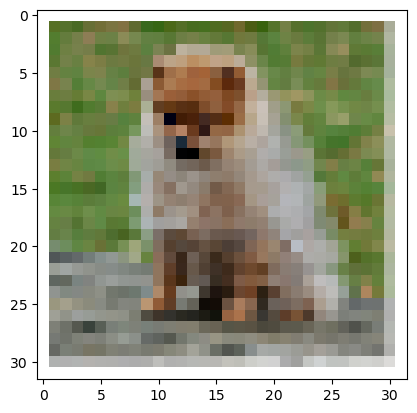

In [15]:
import matplotlib.pyplot as plt
from tensorflow.keras.utils import load_img,img_to_array
img=load_img('dog.png',target_size=(32,32))
plt.imshow(img)

Convert the image to a numpy array

In [16]:
from tensorflow.keras.utils import img_to_array
image_to_test=img_to_array(img)

In [17]:
list_of_images=np.expand_dims(image_to_test,axis=0)

make predictions using the model

In [18]:
results=model.predict(list_of_images)

1/1 [==============================] - 0s 194ms/step


since we are only testing one image, we only need to check the first result

In [19]:
single_result=results[0]

We will get a likeliood score for all 10 possible classes. Find out which class has the highest score

In [20]:
most_likely_class_index=int(np.argmax(single_result))
class_likelihood=single_result[most_likely_class_index]

Get the name of the most likely class

In [21]:
class_label=class_labels[most_likely_class_index]

In [22]:
print('This image is a {} likelihood : {:2f}'.format(class_label,class_likelihood))

This image is a Truck likelihood : 1.000000
